In [6]:
#we now have some clean data
#for sentiment we need the corpus and not our document term matrix.
#this is because word order matters here etc. "great" vs "not great" has very different meanings.
#vi bruger textblob import, som kan give en string en polarity og en subjectivity. begge tal går fra 0 til 1.
#polarity er hvor negativ(0)/positiv(1) sætningen er ladet.
#subjectivity er hvor objektiv(0)/subjektiv(1) sætningen er.
#textblob bruger et library af data fra linguister, som har givet ratings til ALLE måder man kan bruge et ord på.
#f.eks ordet "not" kan have 5 forskellige ratings i 5 forskellige måder ordet bliver brugt på. vi kunne håbe på
#at analysere hvilken måde det blev benyttet i vores tilfælde, men det gør textblob ikke. Den finder gennemsnits
#rangering af alle de 5 brugsmåder og giver alle "not" ord i vores tekst den gennemsnitlige værdi. 
#Dette er ikke optimalt men stadig brugbart.

import pandas as pd
data= pd.read_pickle('corpussix.pkl')
data


,textbits,Newspapers
bbc,"The UK's ""test, track and trace"" coronavirus s...",BBC
dailymail,By Kellie Chudzinski For Dailymail.com Publi...,DailyMail
fox,Michigan governor doubles down on state of eme...,FoxNews
newsau,A vaccine is widely acknowledged as the key to...,NewsAU
theguardian,More people are staying indoors to avoid conta...,TheGuardian
thestar,Vicki McKenna came to the Ministry of Health’s...,TheStar


In [7]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['textbits'].apply(pol)
data['subjectivity'] = data['textbits'].apply(sub)
data

,textbits,Newspapers,polarity,subjectivity
bbc,"The UK's ""test, track and trace"" coronavirus s...",BBC,0.088018,0.419797
dailymail,By Kellie Chudzinski For Dailymail.com Publi...,DailyMail,0.080667,0.436840
fox,Michigan governor doubles down on state of eme...,FoxNews,0.071809,0.388011
newsau,A vaccine is widely acknowledged as the key to...,NewsAU,0.099419,0.423819
theguardian,More people are staying indoors to avoid conta...,TheGuardian,0.098736,0.497413
thestar,Vicki McKenna came to the Ministry of Health’s...,TheStar,0.088514,0.426209


In [ ]:
#synes ikke rigtigt de her tal fortæller super meget. tallene er meget ens.
#Men det her var heller ikke vores primære mål.

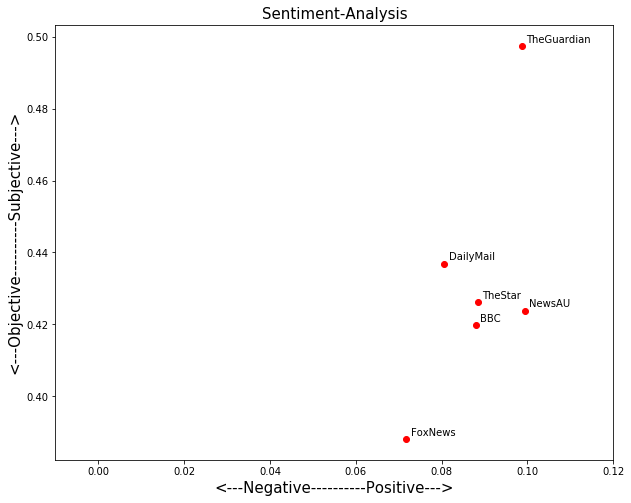

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, newspaper in enumerate(data.index):
    x = data.polarity.loc[newspaper]
    y = data.subjectivity.loc[newspaper]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001,data['Newspapers'][index], fontsize=10)
    plt.xlim(-.01,.12)

plt.title('Sentiment-Analysis', fontsize=15)
plt.xlabel('<---Negative----------Positive--->', fontsize=15)
plt.ylabel('<---Objective----------Subjective--->', fontsize=15)

plt.show()
    #1:19:17
